In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## The Data

**Read the yelp.csv file and set it as a dataframe called df.**

In [2]:
df = pd.read_csv('train.csv')

** Check the head, info , and describe methods on df.**

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


** There are some missing values on keyword and location, but we can't simply drop the missing entries given the large portion of missing data in location. Will explore feature engineering on later steps.**

#### **Create a new column called "length" which is the number of words in the text column.**

In [6]:
df['length'] = df['text'].apply(len)

In [7]:
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


## EDA

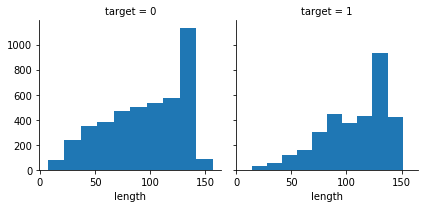

In [8]:
g = sns.FacetGrid(df, col = 'target')
g = g.map(plt.hist, 'length')

** From the histogram above, no clear difference on text length between disaster tweets and non-disaster tweets. **

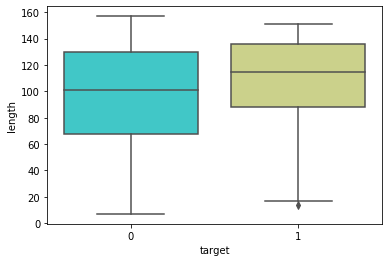

In [9]:
sns.boxplot(x = 'target', y = 'length', data = df, palette = 'rainbow')

** Based on the box plot, disaster tweets has higher average text length than non-disaster tweets. **

In [12]:
df['location'].nunique()

3341

In [13]:
df['location'].value_counts()

USA                            104
New York                        71
United States                   50
London                          45
Canada                          29
                              ... 
Richmond Heights, OH             1
Cavite, Philippines              1
Sandton, South Africa            1
Dubai, United Arab Emirates      1
South Korea GMT+9                1
Name: location, Length: 3341, dtype: int64

In [26]:
df[df['target'] == 1]['location'].nunique()
# Disaster locations have 1513 entrees

1513

In [28]:
df[df['target'] == 0]['location'].nunique()
# Non-disaster locations are 2142

2142

In [29]:
df['location'].describe()
# Total unique locations are 3341, and only 5080 locations are recorded. 
# We have in total 7613 tweets, so around 37% of location data is missing.

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

** Let's first try only using text as X to feed in the model. **

## Text Pre-processing

Preprocessing target: convert the raw messages (sequence of characters) into vectors (sequences of numbers) -> creating bag of words.
As a first step, let's write a function that will split a message into its individual words and return a list.

In [34]:
import string


In [35]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Next step: tokenization -> tokenize the text in to a list of tokens.

In [36]:
from nltk.corpus import stopwords
df['text'].head(5).apply(text_process)

0    [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [residents, asked, shelter, place, notified, o...
3    [13000, people, receive, wildfires, evacuation...
4    [got, sent, photo, Ruby, Alaska, smoke, wildfi...
Name: text, dtype: object

In [37]:
# Create a new variable named tokens for the above process
df['tokens'] = df['text'].apply(text_process)

In [38]:
df.head(10)

,id,keyword,location,text,target,length,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,"[RockyFire, Update, California, Hwy, 20, close..."
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,"[flood, disaster, Heavy, rain, causes, flash, ..."
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,"[Im, top, hill, see, fire, woods]"
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,"[Theres, emergency, evacuation, happening, bui..."
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,"[Im, afraid, tornado, coming, area]"


### Continuing Normalization

Let's continue to normalize the text by applying stemming or distinguishing by part of speech.

### Vectorization

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


##### Step 1: Use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

26473


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of tweets. Let's go ahead and check out how the bag-of-words counts for the entire text corpus is a large, sparse matrix:

In [42]:
text_bow = bow_transformer.transform(df['text'])

In [43]:
print('Shape of Sparse Matrix: ', text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)

Shape of Sparse Matrix:  (7613, 26473)
Amount of Non-Zero occurences:  75006


In [44]:
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


### Term Weighting and Normalization with TF-IDF 

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_bow)

In [46]:
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(7613, 26473)


## Training a Model

We'll be using scikit-learn here, choosing the __Naive Bayes__ classifier to start with:

In [48]:
from sklearn.naive_bayes import MultinomialNB
disaster_detect_model = MultinomialNB().fit(text_tfidf, df['target'])

In [49]:
text4 = df['text'][3]
print(text4)

13,000 people receive #wildfires evacuation orders in California 


In [50]:
bow4 = bow_transformer.transform([text4])
print(bow4)
print(bow4.shape)

  (0, 144)	1
  (0, 2334)	1
  (0, 14502)	1
  (0, 22409)	1
  (0, 22635)	1
  (0, 23345)	1
  (0, 26071)	1
(1, 26473)


In [51]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 26071)	0.4024513325168046
  (0, 23345)	0.4718026141633829
  (0, 22635)	0.25921479580657425
  (0, 22409)	0.39780696282539063
  (0, 14502)	0.3391667965318131
  (0, 2334)	0.2781109881741682
  (0, 144)	0.44453648958637354


In [53]:
print('predicted:', disaster_detect_model.predict(tfidf4)[0])
print('expected:', df.target[3])

predicted: 1
expected: 1


## Model Evaluation


In [54]:
all_predictions = disaster_detect_model.predict(text_tfidf)
print(all_predictions)

[1 1 1 ... 1 1 1]


In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(df['target'], all_predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4342
           1       0.97      0.83      0.89      3271

    accuracy                           0.91      7613
   macro avg       0.93      0.90      0.91      7613
weighted avg       0.92      0.91      0.91      7613



## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

tweets_train, tweets_test, target_train, target_test = \
train_test_split(df['text'], df['target'], test_size=0.2, random_state=101)

print(len(tweets_train), len(tweets_test), len(target_train) + len(target_test))

6090 1523 7613


#### Creating a data pipeline

In [64]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [65]:
pipeline.fit(tweets_train,target_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x12db884d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [66]:
predictions = pipeline.predict(tweets_test)

In [67]:
print(classification_report(predictions,target_test))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1021
           1       0.65      0.82      0.73       502

    accuracy                           0.80      1523
   macro avg       0.77      0.80      0.78      1523
weighted avg       0.82      0.80      0.80      1523



In [68]:
# If using random forest classifier:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [70]:
# Create the training and testing sets again
tweets_train, tweets_test, target_train, target_test = \
train_test_split(df['text'], df['target'], test_size=0.2, random_state=101)

In [71]:
pipeline_rf.fit(tweets_train, target_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x12db884d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 t...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0

In [72]:
rf_pred = pipeline_rf.predict(tweets_test)

In [78]:
print(classification_report(rf_pred,target_test))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1023
           1       0.62      0.78      0.69       500

    accuracy                           0.77      1523
   macro avg       0.75      0.77      0.75      1523
weighted avg       0.79      0.77      0.77      1523

